In [2]:
## Load dataset with and without SAR
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import data

import SyntheticDatacheck
reload(SyntheticDatacheck)

from evaluation import load_model
from train import train_GAT_GraphSVX_foroptuna, train_GraphSAGE_foroptuna
import torch

from evaluation import get_sar_indices


In [5]:
model_name='GAT'
dataset_name='100K_accts_EASY25'
dataset='_EASY'


In [6]:
model, traindata, testdata, feature_names, target_names = load_model('GAT', dataset_name)

sar_indices=get_sar_indices(model,testdata)

sar_indices_used=sar_indices[:500]

count=pd.DataFrame

model.set_return_attention_weights(True)
model.eval()
with torch.no_grad():
    _,attention_weights = model.forward(testdata.x, testdata.edge_index)
    
types = ['llr']

import SyntheticDatacheck
reload(SyntheticDatacheck)
#Create an object of the class datacheck

dc={}
#add something to the dictionary
# dc.update({'llr':SyntheticDatacheck.Datacheck(dataset_name,importance='llr',aggregated=True,attention_weights=attention_weights,sar_indices_used=sar_indices_used)})
for type in types: 
    dc.update({type:SyntheticDatacheck.Datacheck(dataset_name,importance=type,aggregated=True,attention_weights=attention_weights,sar_indices_used=sar_indices_used)})
#add to the object the attention weights



last_sar_index 1870
last_sar_index 1870
agg Index(['sum', 'in_sum', 'out_sum', 'mean', 'in_mean', 'out_mean', 'median',
       'in_median', 'out_median', 'std', 'in_std', 'out_std', 'max', 'in_max',
       'out_max', 'min', 'in_min', 'out_min', 'count_in', 'count_out',
       'n_unique_in', 'n_unique_out', 'count_days_in_bank',
       'count_phone_changes', 'sum_spending', 'mean_spending',
       'median_spending', 'std_spending', 'max_spending', 'min_spending',
       'count_spending', 'is_sar', 'account'],
      dtype='object')


divide by zero encountered in log


importance        account  count_days_in_bank_1  count_in_1  count_out_1  \
0         5777              1.003642    0.781823     0.968759   
1        19982              1.003642    0.781823     0.968759   
2        16548              1.003642    0.781823     0.968759   
3        40135              1.003642    0.781823     0.968759   
4        17484              1.003642    0.781823     0.968759   
...        ...                   ...         ...          ...   
99925    27067              1.003642    0.781823     0.968759   
99926    74344              1.003642    0.781823     0.968759   
99927    69087              1.003642    0.781823     0.968759   
99928     3668              1.003642    0.781823     0.968759   
99929    13265              1.003642    0.781823     0.968759   

       count_phone_changes_1  count_spending_1  in_max_1  in_mean_1  \
0                    1.04117          1.003816  1.226165   1.046393   
1                    1.04117          1.003816  1.226165   1.04639

In [7]:
import evaluation
reload(SyntheticDatacheck)


<module 'SyntheticDatacheck' from '/home/agnes/desktop/flib/thesis_XAML/SyntheticDatacheck.py'>

In [8]:
feature_importance_SVX, _, _ = evaluation.load_evaluation_data_SVX(model_name, dataset_name)
feature_importance_LIME, _ = evaluation.load_evaluation_data_LIME(model_name, dataset_name)
feature_importance_SHAP = evaluation.load_evaluation_data_SHAP(model_name, dataset_name)
feature_importance_SVX=pd.DataFrame(feature_importance_SVX,columns=feature_names)
feature_importance_LIME=pd.DataFrame(feature_importance_LIME,columns=feature_names)
feature_importance_SHAP=pd.DataFrame(feature_importance_SHAP,columns=feature_names)

In [9]:
# feature_importance_groundtruth_std=dc.get('std').importance_test.iloc[sar_indices_used]
feature_importance_groundtruth_llr=dc.get('llr').importance_test.iloc[sar_indices_used]

In [10]:
normal_test=pd.read_csv(f'ultra_final_data/{dataset_name}/bank/test/nodes.csv')
without_sar=pd.read_csv(f'ultra_final_data/{dataset_name}_withoutSAR/bank/test/nodes.csv')


In [11]:
account_ids=normal_test.iloc[sar_indices_used]['account'].values
account_ids

array([16248, 98907,  6990, 30271, 13321, 91384, 80390, 76066,  9650,
       83839, 52894, 18723, 42772, 98106, 87117, 60575, 55763, 48789,
        5771, 18524,  3089,  6746, 49252, 50932,  8240, 60391, 19150,
       85440, 80267, 99489, 48989,   236,  8754, 35568, 59341, 16729,
       95141, 25878, 52941,  7271, 56511, 25498, 58506, 53972, 60620,
       84128, 42271, 18890, 52539, 93404, 95315, 56178, 50362, 14550,
       86858, 52852, 19126, 19140, 78041, 52126, 77078, 98690, 94088,
       98625, 40432, 48263, 99893, 10546, 82677, 39379, 49590, 81891,
       95163, 94177, 36449, 48092, 78461, 52517, 16281, 18887, 50805,
       52143, 99996, 80011,  8252, 98639,  8070, 53015, 81024, 55394,
       17925, 60303,  8910,  9618, 59432, 52430, 12907, 17427, 79061,
       87202, 12741, 10654, 93610, 60001, 51232, 75019, 55480, 29940,
       75758, 13977, 14393, 51325, 22227, 53763, 11829, 57199, 42631,
       85378, 14167, 52690, 32714, 76756,   946, 58793, 17034, 71483,
       55303,  7292,

In [21]:
def found(feature_importance):
    n_more_n=0
    n_less_n=0
    n_to_s=0
    s_to_n=0
    s_less_s=0
    s_more_s=0
    no_change=0

    nodes_s_less_s={}
    for node in range(500):
        abs_feature_importance=feature_importance.iloc[node]
        top_features_expl = abs_feature_importance.sort_values(ascending=False).index[:10]
        abs_feature_importance_gt=feature_importance_groundtruth_llr.iloc[node]
        top_features_groundtruth = abs_feature_importance_gt.sort_values(ascending=False).index[:10]

        missing_features_llr = set(top_features_expl) - set(top_features_groundtruth)
        missing_features_llr2 = set(top_features_groundtruth)-set(top_features_expl)

        #non-missing features llr
        # find the union of ttop_features svx and top_features groundtruth
        # intersection_top_features = missing_features_llr & missing_features_llr2
        
        intersection_top_features = set(top_features_expl).intersection(set(top_features_groundtruth))
        # print(len(missing_features_llr),len(missing_features_llr2),len(intersection_top_features2), len(missing_features_llr)+len(intersection_top_features2),len(intersection_top_features2)+len(missing_features_llr2))

        if len(missing_features_llr)+len(intersection_top_features)!=10:
            print('something wrong')
        if len(intersection_top_features)+len(missing_features_llr2)!=10:
            print('something wrong')

        # if intersection_top_features & intersection_top_features2
        account_id = account_ids[node]

        llr_before = dc.get('llr').llr_before[dc.get('llr').llr_before['account'] == account_id][list(intersection_top_features)]
        llr_after = dc.get('llr').llr_after[dc.get('llr').llr_after['account'] == account_id][list(intersection_top_features)]

        llr_before_dict = llr_before.iloc[0].to_dict()  # Convert to dictionary for easier comparison
        llr_after_dict = llr_after.iloc[0].to_dict()    # Convert to dictionary for easier comparison

        added=0
        
        for f in intersection_top_features:
            before_value = llr_before_dict.get(f, None)
            after_value = llr_after_dict.get(f, None)
        
            if before_value == after_value:
                no_change += 1
                added+=1
            elif before_value > 0 and after_value > 0:
                if before_value < after_value:
                    n_more_n += 1
                    added+=1
                else:
                    n_less_n += 1
                    added+=1
            elif before_value < 0 and after_value < 0:
                if before_value > after_value:
                    s_more_s += 1
                    added+=1
                else:
                    s_less_s += 1
                    added+=1
                    # nodes_s_less_s.update({node: f})
                    # if node in nodes_s_less_s:
                    #     nodes_s_less_s[node].append(f)
                    # else:
                    #     nodes_s_less_s[node] = [f]
            elif before_value >= 0 and after_value < 0:
                n_to_s += 1
                added+=1
            elif before_value < 0 and after_value >= 0 :
                s_to_n += 1
                added+=1
        if added != len(intersection_top_features):
            print('something wrong ', added, len(intersection_top_features))
            print('intersection',intersection_top_features)
    print(n_more_n, n_less_n, n_to_s, s_to_n, s_less_s, s_more_s, no_change)
    # Create a dictionary with the counts
    data = {
        "n_more_n": [n_more_n],
        "n_less_n": [n_less_n],
        "n_to_s": [n_to_s],
        "s_to_n": [s_to_n],
        "s_less_s": [s_less_s],
        "s_more_s": [s_more_s],
        "no_change": [no_change]
    }
    return pd.DataFrame(data).T


# Print the DataFrame


In [31]:
def missed_by_gt(feature_importance):
    n_more_n=0
    n_less_n=0
    n_to_s=0
    s_to_n=0
    s_less_s=0
    s_more_s=0
    no_change=0

    nodes_s_less_s={}
    for node in range(500):
        abs_feature_importance=feature_importance.iloc[node]
        top_features_expl = abs_feature_importance.sort_values(ascending=False).index[:10]
        abs_feature_importance_gt=feature_importance_groundtruth_llr.iloc[node]
        top_features_groundtruth = abs_feature_importance_gt.sort_values(ascending=False).index[:10]

        missing_features_llr = set(top_features_expl) - set(top_features_groundtruth)
        if node == 1:
            print(missing_features_llr)
        account_id = account_ids[node]

        llr_before = dc.get('llr').llr_before[dc.get('llr').llr_before['account'] == account_id][list(missing_features_llr)]
        llr_after = dc.get('llr').llr_after[dc.get('llr').llr_after['account'] == account_id][list(missing_features_llr)]

        llr_before_dict = llr_before.iloc[0].to_dict()  # Convert to dictionary for easier comparison
        llr_after_dict = llr_after.iloc[0].to_dict()    # Convert to dictionary for easier comparison

        for f in missing_features_llr:
            before_value = llr_before_dict.get(f, None)
            after_value = llr_after_dict.get(f, None)
            
            if before_value is None or after_value is None:
                continue  # Skip if either value is None (missing)

            if before_value == after_value:
                no_change += 1
            elif before_value > 0 and after_value > 0:
                if before_value < after_value:
                    n_more_n += 1
                else:
                    n_less_n += 1
            elif before_value < 0 and after_value < 0:
                if before_value > after_value:
                    s_more_s += 1
                else:
                    s_less_s += 1
                    # nodes_s_less_s.update({node: f})
                    if node in nodes_s_less_s:
                        nodes_s_less_s[node].append(f)
                    else:
                        nodes_s_less_s[node] = [f]
            elif before_value >= 0 and after_value < 0:
                n_to_s += 1
            elif before_value < 0 and after_value >= 0 :
                s_to_n += 1

    print(n_more_n, n_less_n, n_to_s, s_to_n, s_less_s, s_more_s, no_change)

    # Create a dictionary with the counts
    data = {
        "n_more_n": [n_more_n],
        "n_less_n": [n_less_n],
        "n_to_s": [n_to_s],
        "s_to_n": [s_to_n],
        "s_less_s": [s_less_s],
        "s_more_s": [s_more_s],
        "no_change": [no_change]
    }

    # Create a DataFrame from the dictionary
    return pd.DataFrame(data).T

# # Print the DataFrame
# print(view)

# #set column header to count
# count['Count of missed'+dataset]=view.T
# # count['Percentage missed']=count['Count of missed']/(count['Count of found']+count['Count of missed'])
# count

In [32]:
def missed_by_expl(feature_importance):
    n_more_n=0
    n_less_n=0
    n_to_s=0
    s_to_n=0
    s_less_s=0
    s_more_s=0
    no_change=0

    nodes_s_less_s={}
    for node in range(500):
        abs_feature_importance=abs(feature_importance.iloc[node])
        top_features_expl = abs_feature_importance.sort_values(ascending=False).index[:10]
        abs_feature_importance_gt=abs(feature_importance_groundtruth_llr.iloc[node])
        top_features_groundtruth = abs_feature_importance_gt.sort_values(ascending=False).index[:10]

        missing_features_llr = set(top_features_groundtruth)-set(top_features_expl) 
        
        
      
        # if node == 1:
        #     print(missing_features_llr)
        account_id = account_ids[node]

        llr_before = dc.get('llr').llr_before[dc.get('llr').llr_before['account'] == account_id][list(missing_features_llr)]
        llr_after = dc.get('llr').llr_after[dc.get('llr').llr_after['account'] == account_id][list(missing_features_llr)]

        llr_before_dict = llr_before.iloc[0].to_dict()  # Convert to dictionary for easier comparison
        llr_after_dict = llr_after.iloc[0].to_dict()    # Convert to dictionary for easier comparison

        for f in missing_features_llr:
            before_value = llr_before_dict.get(f, None)
            after_value = llr_after_dict.get(f, None)
            
            if before_value is None or after_value is None:
                continue  # Skip if either value is None (missing)

            if before_value == after_value:
                no_change += 1
            elif before_value > 0 and after_value > 0:
                if before_value < after_value:
                    n_more_n += 1
                else:
                    n_less_n += 1
            elif before_value < 0 and after_value < 0:
                if before_value > after_value:
                    s_more_s += 1
                else:
                    s_less_s += 1
                    # nodes_s_less_s.update({node: f})
                    # if node in nodes_s_less_s:
                    #     nodes_s_less_s[node].append(f)
                    # else:
                    #     nodes_s_less_s[node] = [f]
            elif before_value >= 0 and after_value < 0:
                n_to_s += 1
            elif before_value < 0 and after_value >= 0 :
                s_to_n += 1

    print(n_more_n, n_less_n, n_to_s, s_to_n, s_less_s, s_more_s, no_change)

    # Create a dictionary with the counts
    data = {
        "n_more_n": [n_more_n],
        "n_less_n": [n_less_n],
        "n_to_s": [n_to_s],
        "s_to_n": [s_to_n],
        "s_less_s": [s_less_s],
        "s_more_s": [s_more_s],
        "no_change": [no_change]
    }

    # Create a DataFrame from the dictionary
    return pd.DataFrame(data).T

In [33]:
lime=found(feature_importance_LIME)
shap=found(feature_importance_SHAP)
svx=found(feature_importance_SVX)

lime.columns=['Intercept'+dataset]
shap.column=['Intercept'+dataset]
svx.columns=['Intercept'+dataset]


0 0 33 126 658 983 0
0 0 38 130 1005 1248 0
0 0 49 164 976 1413 0


Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [34]:
lime['Intercept'+dataset]=found(feature_importance_LIME)
lime['Missed by exp'+dataset]=missed_by_expl(feature_importance_LIME)
lime['Missed by gt'+dataset]=missed_by_gt(feature_importance_LIME)


shap['Intercept'+dataset]=found(feature_importance_SHAP)
shap['Missed by exp'+dataset]=missed_by_expl(feature_importance_SHAP)
shap['Missed by gt'+dataset]=missed_by_gt(feature_importance_SHAP)

svx['Intercept'+dataset]=found(feature_importance_SVX)
svx['Missed by exp'+dataset]=missed_by_expl(feature_importance_SVX)
svx['Missed by gt'+dataset]=missed_by_gt(feature_importance_SVX)



0 0 33 126 658 983 0
0 0 43 0 1386 1552 0
{'out_min', 'sum', 'count_phone_changes', 'max', 'min', 'in_max'}
3 0 11 0 1495 1077 419
0 0 38 130 1005 1248 0
0 0 38 0 1039 1287 0
{'min_spending', 'sum', 'in_std', 'count_in', 'in_mean'}
9 0 12 0 1482 873 1
0 0 49 164 976 1413 0
0 0 27 0 1068 1122 0
{'count_in', 'sum', 'in_max', 'max'}
3 0 24 0 1247 841 7


In [35]:
lime

,Intercept_EASY,Missed by exp_EASY,Missed by gt_EASY
n_more_n,0,0,3
n_less_n,0,0,0
n_to_s,33,43,11
s_to_n,126,0,0
s_less_s,658,1386,1495
s_more_s,983,1552,1077
no_change,0,0,419


In [38]:
shap

,0,Intercept_EASY,Missed by exp_EASY,Missed by gt_EASY
n_more_n,0,0,0,9
n_less_n,0,0,0,0
n_to_s,38,38,38,12
s_to_n,130,130,0,0
s_less_s,1005,1005,1039,1482
s_more_s,1248,1248,1287,873
no_change,0,0,0,1


In [39]:
svx

,Intercept_EASY,Missed by exp_EASY,Missed by gt_EASY
n_more_n,0,0,3
n_less_n,0,0,0
n_to_s,49,27,24
s_to_n,164,0,0
s_less_s,976,1068,1247
s_more_s,1413,1122,841
no_change,0,0,7


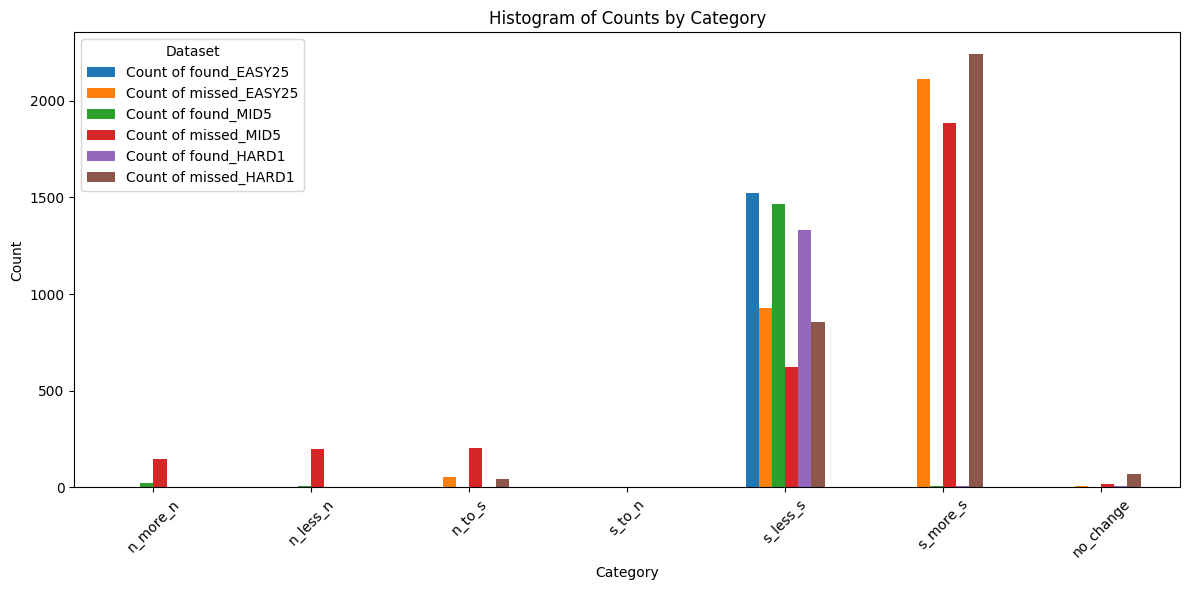

In [63]:
import matplotlib.pyplot as plt

# Plot the histogram
df.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Counts by Category')
plt.xticks(rotation=45)
plt.legend(title='Dataset')

# Show the plot
plt.tight_layout()
plt.show()


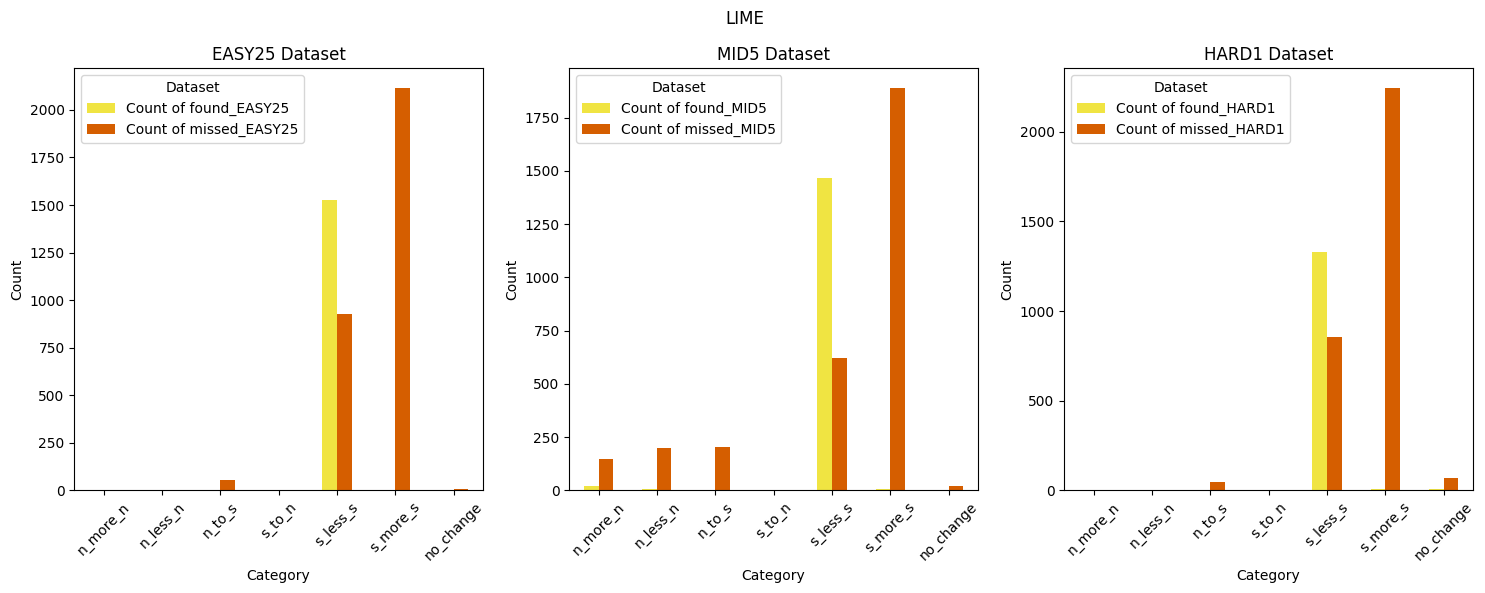

In [84]:
import matplotlib.pyplot as plt

# Define colors
colors = ['#F0E442', '#D55E00']
plots={'LIME vs. groundtruth_llr':['#66C2A5', '#006D2C'],
              'SHAP vs. groundtruth_llr':['#F0E442', '#A14800'],
              'SVX vs. groundtruth_llr':['#66B3FF', '#0055A4']}

plots={'LIME vs. groundtruth_llr':lime,
              'SHAP vs. groundtruth_llr':shap,
              'SVX vs. groundtruth_llr':svx}


# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot each dataset on its own subplot
for i, dataset in enumerate(['EASY25', 'MID5', 'HARD1']):
    df.filter(like=dataset).plot(kind='bar', ax=axes[i], legend=True, color=colors)
    axes[i].set_title(f'{dataset} Dataset')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Dataset')

# Add super title
plt.suptitle('LIME')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


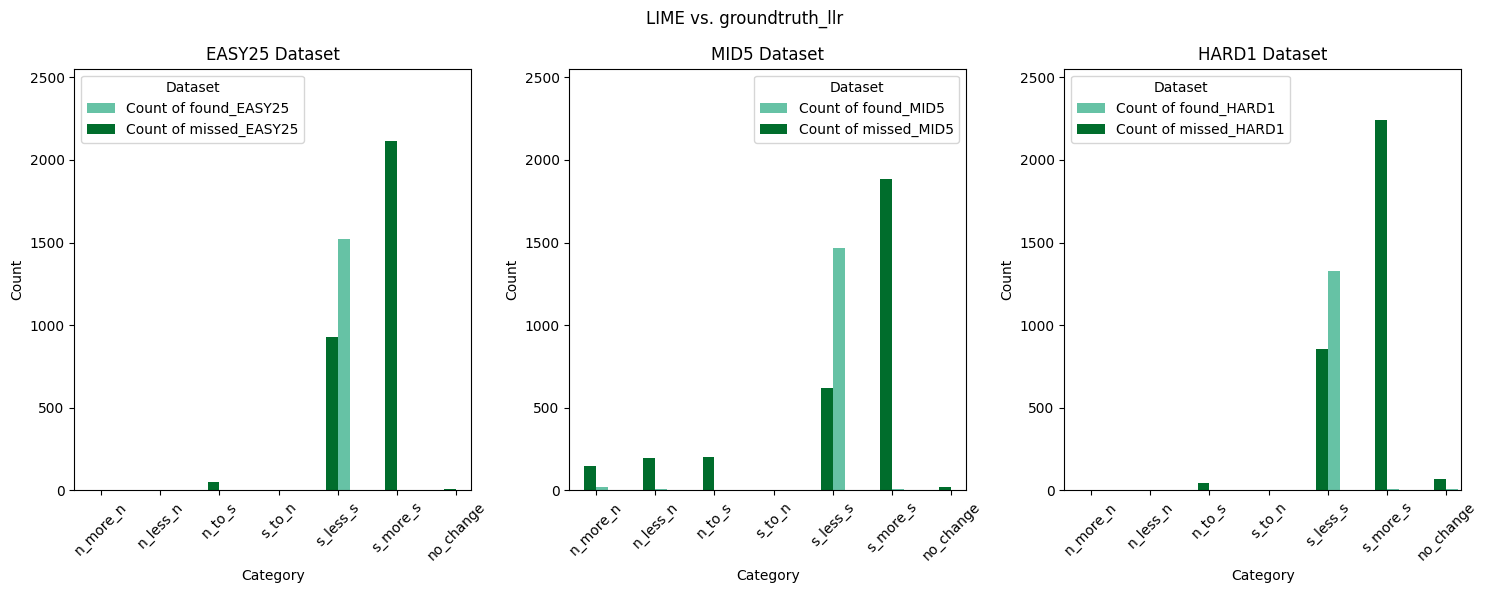

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


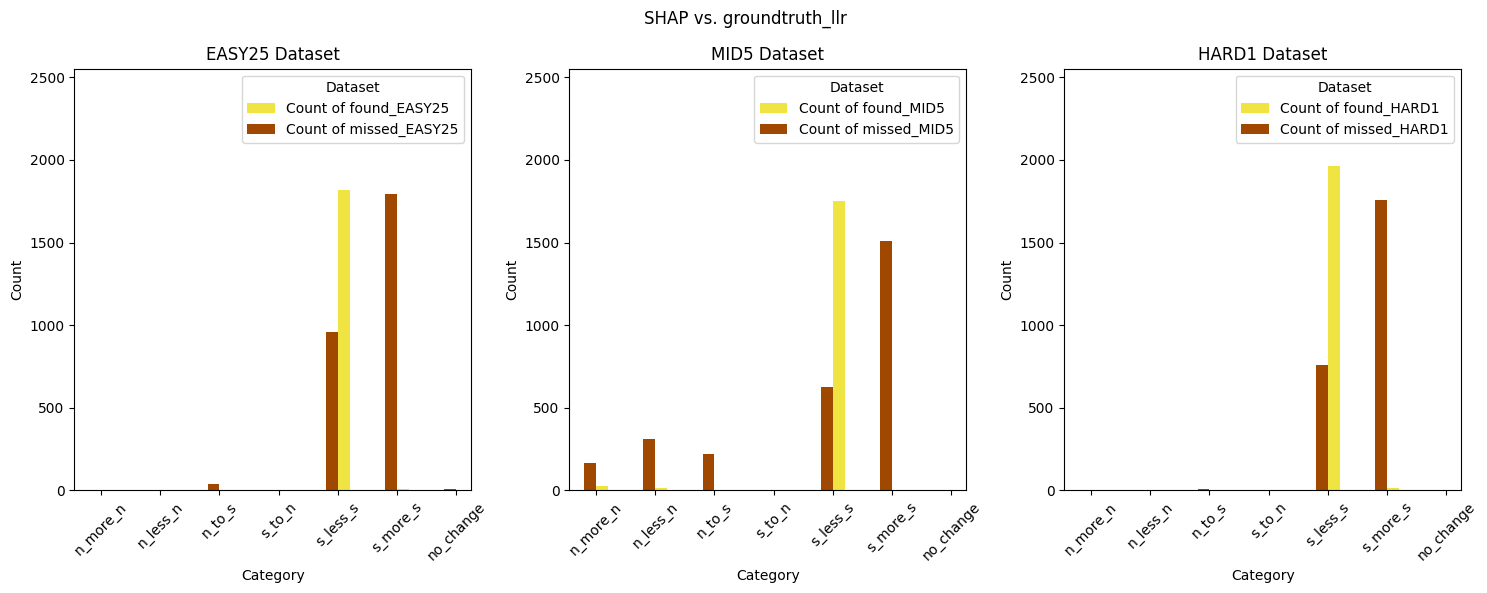

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


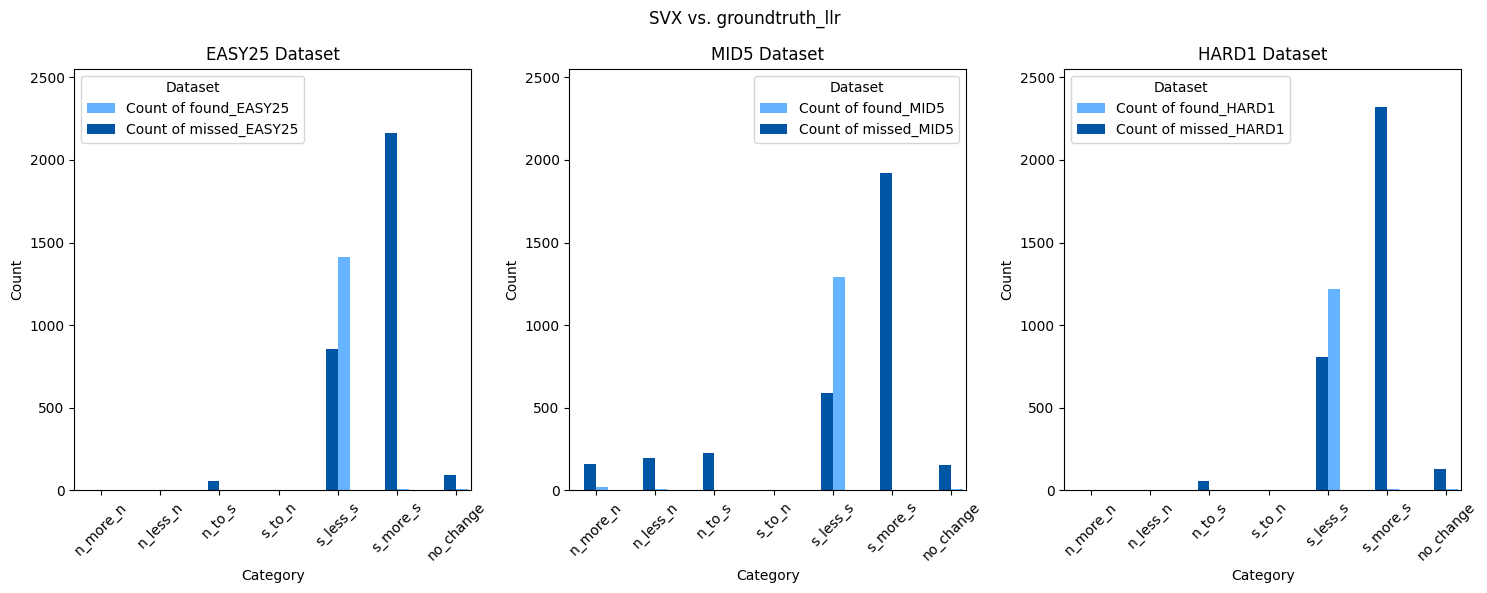

In [106]:
import matplotlib.pyplot as plt
save_dir = f'/home/agnes/desktop/flib/thesis_XAML/evaluation_figures_final/{model_name}/correctness_llr'

# Define colors
colors = ['#F0E442', '#D55E00']

# Define plots and DataFrames
plots = {'LIME vs. groundtruth_llr': ['#66C2A5', '#006D2C'],
         'SHAP vs. groundtruth_llr': ['#F0E442', '#A14800'],
         'SVX vs. groundtruth_llr': ['#66B3FF', '#0055A4']}

dfs = {'LIME vs. groundtruth_llr': lime,
       'SHAP vs. groundtruth_llr': shap,
       'SVX vs. groundtruth_llr': svx}

# Iterate over each key in plots
for key in plots:
    # Create subplots with one row and three columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over each dataset (easy, mid, hard)
    for i, dataset in enumerate(['EASY25', 'MID5', 'HARD1']):
        # Plot each DataFrame on its own subplot
        df = dfs[key].filter(like=dataset)
        for j, (col, color) in enumerate(zip(df.columns, plots[key])):
            df[col].plot(kind='bar', ax=axes[i], color=color, position=j, width=0.2, label=col)
        
        # Set title and labels for each subplot
        axes[i].set_title(f'{dataset} Dataset')
        axes[i].set_xlabel('Category')
        axes[i].set_ylabel('Count')
        axes[i].set_xticklabels(df.index, rotation=45)
        axes[i].legend(title='Dataset')
                # Set y-axis scale
        axes[i].set_ylim(0, max_count * 1.1)  # Adjust the multiplier as needed

    
    # Add super title
    fig.suptitle(key)
    
    # Adjust layout
    plt.tight_layout()

    plt.savefig(f'{save_dir}/characterplots_{key}.eps', format = 'eps', bbox_inches='tight')
    plt.savefig(f'{save_dir}/characterplots_{key}.png')

    # Show the plot
    plt.show()
    
    
    #save plots 


#save the plots



In [24]:
lime=found(feature_importance_LIME)
lime.columns=['Count of found'+dataset]
lime['Count of missed'+dataset]=missed(feature_importance_LIME)

lime

0 0 2 0 1524 4 0
0 0 53 0 927 2113 6


,Count of found_EASY25,Count of missed_EASY25
n_more_n,0,0
n_less_n,0,0
n_to_s,2,53
s_to_n,0,0
s_less_s,1524,927
s_more_s,4,2113
no_change,0,6


In [25]:
shap=found(feature_importance_SHAP)
shap.columns=['Count of found'+dataset]
shap['Count of missed'+dataset]=missed(feature_importance_SHAP)

shap

0 0 0 0 1817 9 0
1 0 41 0 958 1797 10


,Count of found_EASY25,Count of missed_EASY25
n_more_n,0,1
n_less_n,0,0
n_to_s,0,41
s_to_n,0,0
s_less_s,1817,958
s_more_s,9,1797
no_change,0,10


In [31]:
svx=found(feature_importance_SVX)
svx.columns=['Count of found'+dataset]
svx['Count of missed'+dataset]=missed(feature_importance_SVX)

svx

2 0 1 0 1413 8 6
2 0 57 0 854 2162 93


,Count of found_EASY25,Count of missed_EASY25
n_more_n,2,2
n_less_n,0,0
n_to_s,1,57
s_to_n,0,0
s_less_s,1413,854
s_more_s,8,2162
no_change,6,93


## THIS WAS FOR MID5 svx


In [27]:
dc.get('llr').agg_withoutSAR.iloc[sar_indices_used[1]]


sum                     -2494.302933
in_sum                   5456.142103
out_sum                 -7950.445036
mean                       24.043954
in_mean                   618.001538
out_mean                 -789.720872
median                    142.915817
in_median                 545.008631
out_median               -827.983923
std                       731.283907
in_std                    303.123147
out_std                   426.766997
max                      1137.717833
in_max                   1159.368040
out_max                  -245.610837
min                     -1306.739849
in_min                    222.984806
out_min                 -1306.984271
count_in                    7.710505
count_out                   9.183560
n_unique_in                 1.305137
n_unique_out                1.587595
count_days_in_bank        353.706321
count_phone_changes         0.000000
sum_spending           276998.170652
mean_spending            1524.623630
median_spending           481.115013
s

In [28]:
diff=dc.get('llr').agg_normal_test.iloc[sar_indices_used[0]]-dc.get('llr').agg_withoutSAR.iloc[sar_indices_used[0]]
diff

sum                     2914.102481
in_sum                  2304.482264
out_sum                  609.620217
mean                      12.835726
in_mean                   84.711017
out_mean                -247.654743
median                  -186.074696
in_median                -32.731693
out_median              -268.674920
std                      325.418878
in_std                   245.256815
out_std                    9.452071
max                      416.165900
in_max                   416.165900
out_max                 -378.326408
min                     -275.007488
in_min                  -106.950490
out_min                 -247.404067
count_in                  -0.159575
count_out                 -5.207024
n_unique_in                1.079382
n_unique_out              -1.274201
count_days_in_bank       -15.688936
count_phone_changes        0.000000
sum_spending           44659.214339
mean_spending            276.505603
median_spending            9.837164
std_spending            1007

In [29]:
dc.get('llr').normal_test.iloc[sar_indices_used[0]]


account                      16248
bank                          bank
sum                       13104.79
in_sum                    14442.42
out_sum                   -1337.63
mean                      655.2395
in_mean                 760.127368
out_mean                  -1337.63
median                      764.83
in_median                   764.83
out_median                -1337.63
std                     513.124273
in_std                  213.707639
out_std                        0.0
max                         1287.0
in_max                      1287.0
out_max                   -1337.63
min                       -1337.63
in_min                      189.08
out_min                   -1337.63
count_in                      19.0
count_out                      1.0
n_unique_in                    3.0
n_unique_out                   1.0
count_days_in_bank           362.0
count_phone_changes            0.0
sum_spending             222173.33
mean_spending          1200.936919
median_spending     

In [30]:
dc_llr=SyntheticDatacheck.Datacheck(dataset_name,importance='llr',aggregated=False,attention_weights=attention_weights,sar_indices_used=sar_indices_used)

divide by zero encountered in log


importance        account  bank  count_days_in_bank_1  count_in_1  count_out_1  \
0         5777     0              0.621025   -0.134238     0.014935   
1        19982     0              0.735336   -0.416922     0.012919   
2        16548     0             -0.088666    0.052633     0.012919   
3        40135     0              0.621025   -0.117625    -0.000510   
4        17484     0              0.621025   -0.072184     0.012919   
...        ...   ...                   ...         ...          ...   
99925    27067     0             -0.088666    0.062238     0.012919   
99926    74344     0             -0.059373    0.062238     0.012919   
99927    69087     0              0.048258    0.062238     0.012919   
99928     3668     0              0.446968    0.062238     0.012919   
99929    13265     0              0.775086    0.062238     0.012919   

       count_phone_changes_1  count_spending_1  in_max_1  in_mean_1  \
0                   0.893177         -0.171764  2.256301   0.3557